#### Welcome to my kernel. I am a second year Computer Science student from India. This is my first Kaggle submissio. Please consider giving an upvote if you find this useful.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)
import os
print(os.listdir("../input"))


['master.csv']


In [2]:
df = pd.read_csv("../input/master.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


##### The feature HDI for year has data for only 8364 rows out of 27820 rows. The feature country-year only appends the countrya nd the year together. So these two features can be dropped

In [4]:
df1 = df.drop(['HDI for year', 'country-year'], axis=1)
df1 = df1.rename(columns={'suicides/100k pop': 'suicide/100k', ' gdp_for_year ($)': 'GDP', 'gdp_per_capita ($)' : 'GDP/capita'})

df1.head()

,country,year,sex,age,suicides_no,population,suicide/100k,gdp_for_year ($),GDP/capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


# Analysis with respect to Sex 

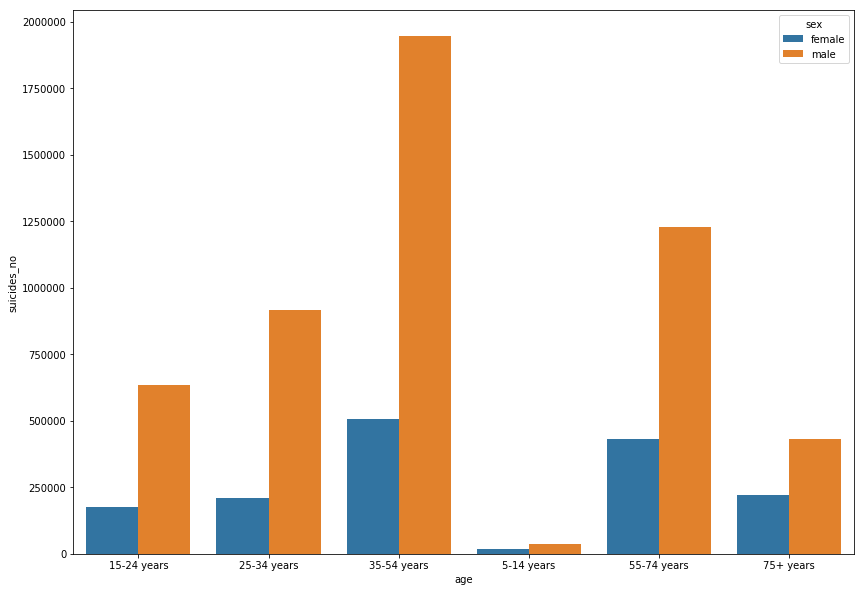

In [5]:
plt.figure(figsize=(14,10))
sns.barplot(x='age',y='suicides_no',data=df1.groupby(['age','sex']).sum().reset_index(),hue='sex')

### Thus except the age group (5-14) years, suicide rates are higher among males than females.

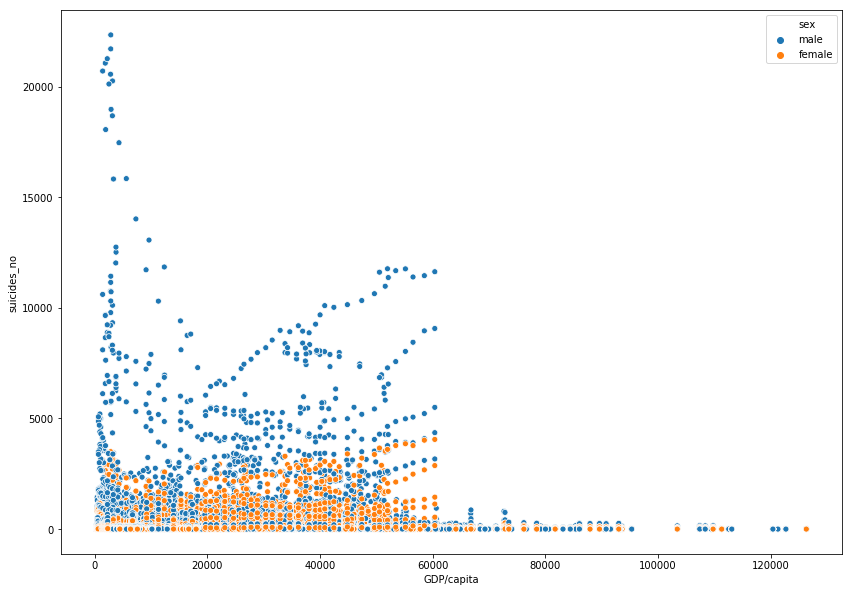

In [6]:
plt.figure(figsize=(14,10))
sns.scatterplot(df1["GDP/capita"], df1["suicides_no"], hue = df1["sex"])

### We clearly notice a relaion between per capita GDP and suicide rates. After nearly 60000 per capita GDP, the suicide rates drop noticeably and are quite similar for both the genders.
### Below that threshold mark of 60000, male suicide rates far exceeds females.

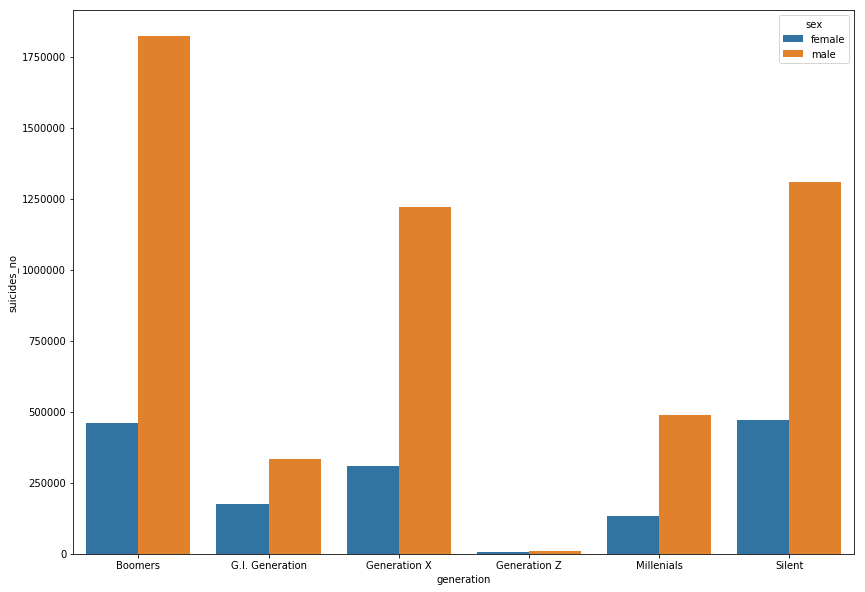

In [7]:
plt.figure(figsize = (14, 10))
sns.barplot(x='generation',y='suicides_no',data=df1.groupby(['generation','sex']).sum().reset_index(),hue='sex')

### Except Generation Z, all other generations show high suicide rates and the rates are much higher for males

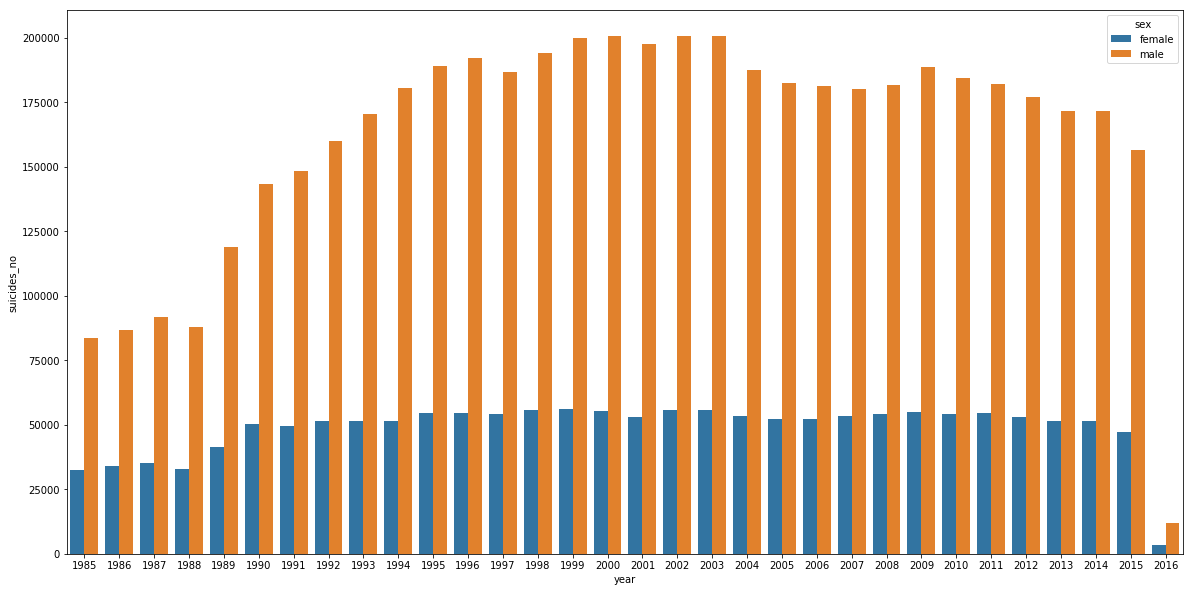

In [8]:
plt.figure(figsize = (20, 10))
sns.barplot(x='year',y='suicides_no',data=df1.groupby(['year','sex']).sum().reset_index(),hue='sex')


### The suicide rates have steadily increased for men and peaked at 2003 and afterwards have decreased so very slightly.
### For females, the suicide rates have increased from 1985 to 1990 and is almost steady thereafter.

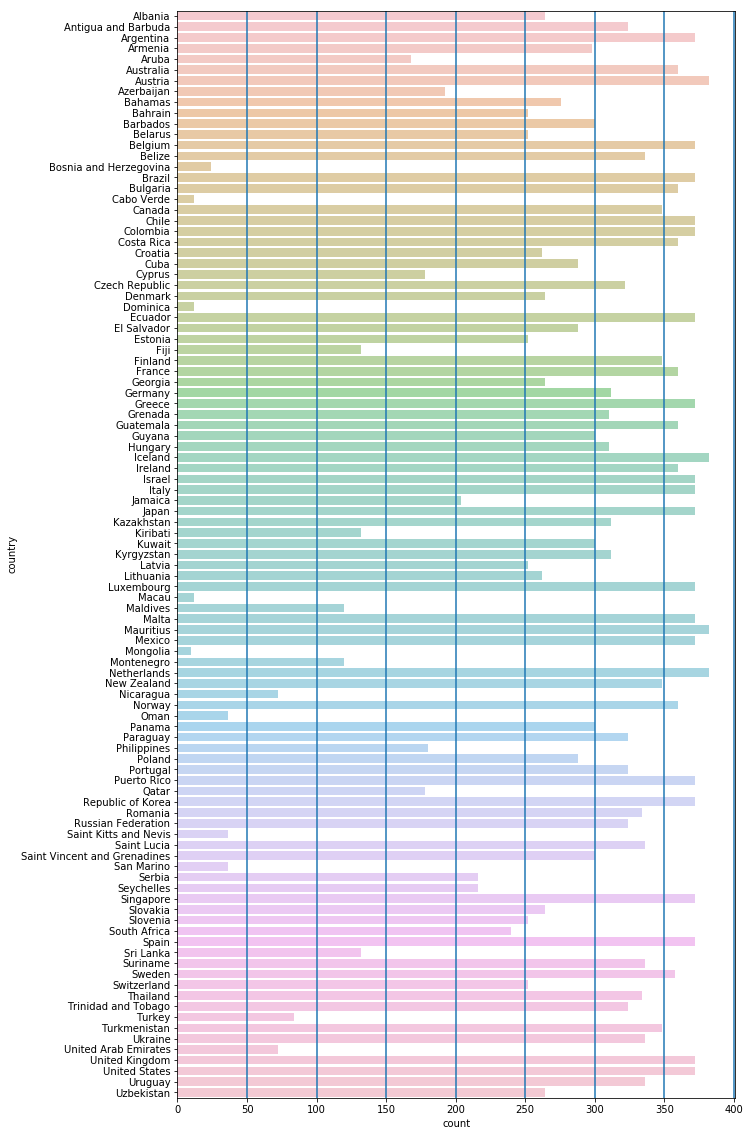

In [9]:
plt.figure(figsize = (10,20))
sns.countplot(y = 'country', data = df1, alpha = 0.5)
for i in range(50,401,50):
    plt.axvline(i)

#### We can see 8 countries with suicide rates below 50, namely San Marino, Saint Kitts and Nevis, Oman, Mongolia, Macau, Cabo Verde, Dominica and Bosnia and Herzegovina.

#### The countries with the highest suicide rates (above 350) are in number, namely USA, UK, Sweden, Spain, Singapore, Republic of Korea, Puerto Rico, Norway, Argentina, Australia, Austria, Belgium, Brazil, Bulgaria, Chile, Colombia, Costa Rica, Ecuador, France, Greece, Guatemala, Ireland, Iceland, Italy, Israel, Japan, Luxemborg, Malta, Mexico, Muritius and Netherlands.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


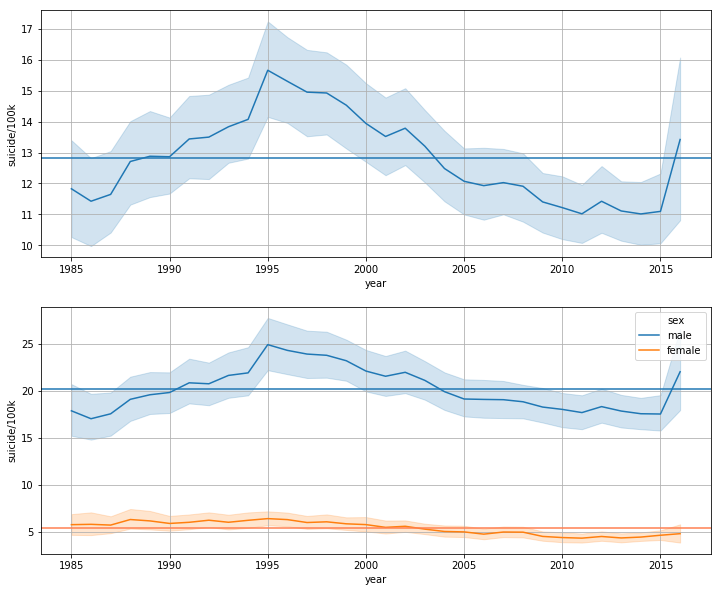

In [10]:
plt.figure(figsize = (12,10))

plt.subplot(2, 1, 1)
sns.lineplot(x = 'year', y = 'suicide/100k', data = df1)
plt.axhline(df1['suicide/100k'].mean())
plt.grid(True)

plt.subplot(2, 1, 2)
sns.lineplot(x = 'year', y = 'suicide/100k', data = df1, hue = 'sex')
plt.grid(True)
plt.axhline(np.mean(list(df1[df1.sex == 'female'].iloc[:,6])), color = 'coral')
plt.axhline(np.mean(list(df1[df1.sex == 'male'].iloc[:,6])))

### The average for number of Suicides per 100000 of the population is a little below 13, around 12.8.
### For males, the average is slightly above 20 and for females slightly above 5.

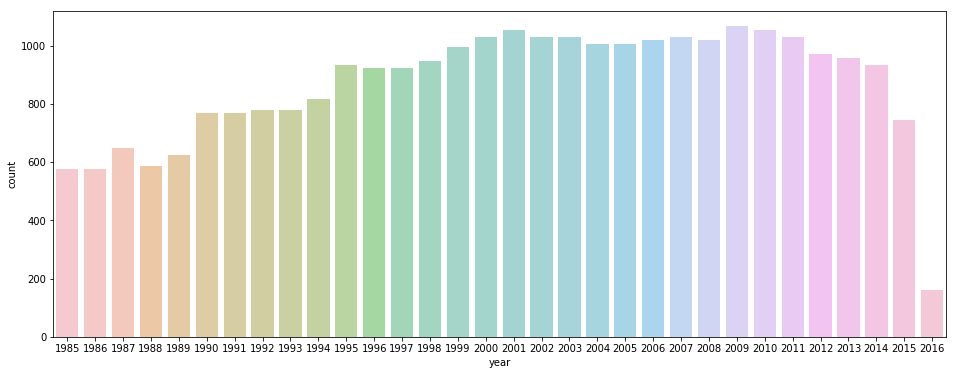

In [11]:
plt.figure(figsize = (16,6))

sns.countplot(x = 'year', data = df1, alpha = 0.5)

### The suicide rates have increased over time and reached a peak at 2009 and slightly decreased thereafter.